In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1=pd.read_excel("gold2021.xlsx")
data2=pd.read_excel("gold2020.xlsx")
data3=pd.read_excel("gold2019.xlsx")
data4=pd.read_excel("gold2018.xlsx")

In [3]:
data=pd.concat([data1,data2,data3,data4])
data=data.sort_values(by='DATE', ascending=True)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data=data.set_index('DATE')

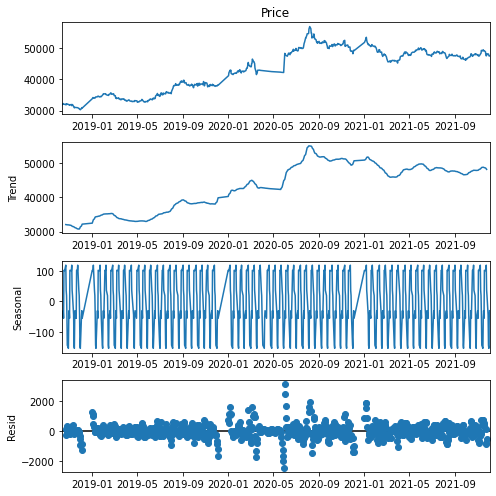

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib

df1=data.sort_values(by='DATE', ascending=True)
matplotlib.rc('figure', figsize=(7, 7))
decompose = seasonal_decompose(df1.Price, period=12, model='additive')
decompose.plot()
plt.show() 

In [7]:
data

,Price
DATE,
2018-10-12,31876
2018-10-15,32264
2018-10-16,32109
2018-10-17,32043
2018-10-18,32037
...,...
2021-11-29,48042
2021-11-30,48085
2021-12-01,47633


In [8]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [9]:
X = data.values
X = X.astype('float32')

In [10]:
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit()

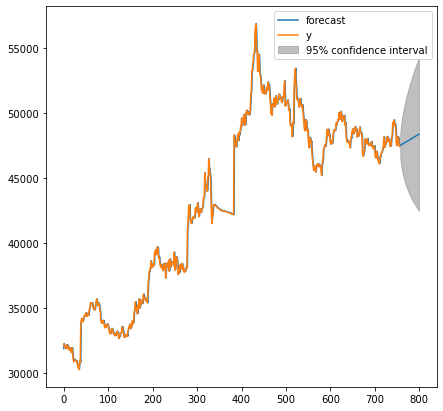

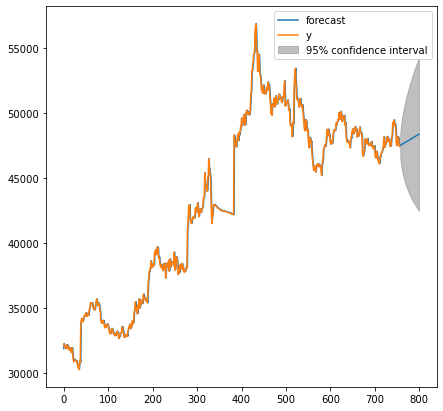

In [12]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,800)

In [13]:
forecast

array([47495.60634082, 47516.21268164, 47536.81902246, 47557.42536328,
       47578.0317041 , 47598.63804491, 47619.24438573, 47639.85072655,
       47660.45706737, 47681.06340819])

In [14]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [25]:
%%writefile for.py
 
import pickle
import streamlit as st
import pandas as pd
import numpy as np
import time
import datetime
from bs4 import BeautifulSoup as BS
from bs4 import BeautifulSoup
import requests


from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error



from datetime import datetime, date, time
data1=pd.read_excel("gold2021.xlsx")
data2=pd.read_excel("gold2020.xlsx")
data3=pd.read_excel("gold2019.xlsx")
data4=pd.read_excel("gold2018.xlsx")
df=pd.concat([data1,data2,data3,data4])
df=df.sort_values(by='DATE', ascending=True)
df= df.loc[:, ~df.columns.str.contains('^Unnamed')]
data=df
data=data.set_index('DATE')
data1=df
 

@st.cache()






def prediction():   
    

    prediction = classifier.predict( [[]])
            
 


    #****************************#
   
      
  
    # this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:Orange;padding:13px"> 
    <h1 style ="color:black;text-align:center;">GOLD PRICE PREDCTION</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
    
    # following lines create boxes in which user can enter data required to make prediction 
    

    
    url="""https://gadgets.ndtv.com/finance/gold-rate-in-india"""
    headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:60.0) Gecko/20100101 Firefox/60.0"}
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')


    
    #***** SLIDE BAR *************#
    url = 'https://gadgets.ndtv.com/finance/gold-rate-in-india'
    html = requests.get(url).content
    df_list = pd.read_html(html)
    
    df2 = df_list[3]
    df2=pd.DataFrame(df2)
    df2.columns =['Date','Pure Gold (24K)','Standard Gold (22K)','% Change'] 
    add_selectbox = st.sidebar.header("Daily Gold Rate In India (15 Days)")
    add_selectbox = st.sidebar.dataframe(df2,height=500)
    #********** SLIDE BAR END ****************#
   


     #********* DAILY PRICE********#
    st.header('Gold Rate Today') 
    df1 = df_list[1]
    df1=pd.DataFrame(df1)
    df1.columns =['Gram 24K','Gold Price','Daily Price Change']
    st.table(df1)

    

    
    
    #********* GRAPH ********#
    st.header('Gold Price')
    col1, col2 = st.columns([1,3])

    with col1:
        From = st.date_input("FROM", value=date(2021, 9, 12),max_value=date(2021, 12, 3) ,min_value=date(2018, 10, 12))
        To=st.date_input("TO", value=date(2021, 9, 12),min_value=date(2018, 10, 12),max_value=date(2021, 12, 3))
            
    #input for date
        dates = pd.date_range(From, To, freq='d')
        df = pd.DataFrame(index=dates, data=data)

    with col2:
        st.line_chart(df)
    #*******GRAPH END************#
    
    
   
    
    
    
    
    
    
    #****PREDICT************#
    st.header('Predict Gold Price')
    col1, col2 = st.columns([1,3])
    with col1:
        Kidhome = st.number_input("Enter Number of Days for Prediction", value= 1, step=1)
    
        X = data.values
        X = X.astype('float32')
    
        model = ARIMA(X, order=(0,1,0))
        model_fit = model.fit()
        forecast=model_fit.forecast(steps=Kidhome)[0]
        prediction=pd.DataFrame(forecast,columns=['Predicted Price'])
        st.dataframe(prediction, height=250)
    with col2:
        st.subheader('Gold Predicted Rate Graph  ')
        st.line_chart(prediction)
    
    
    st.header('Gold Price Today in Cities of India')
    
    df_list = pd.read_html(html)
    df1 = df_list[4]
    df1=pd.DataFrame(df1)
    st.table(df1)
    
    
    st.subheader('Know About Gold Price')
    st.subheader("24 Carat Gold")
    st.text("Gold is deemed to be in its purest form at 24 carats. Pure gold or 24 carat gold signifies 99.9 percent purity and it doesn’t")
    st.text("contain any other metals. The 24 carat gold is used to make gold coins, bars, etc. Various other purities for gold also exist and are measured in relativity to 24 carats.")
    st.subheader("22 Carat Gold")
    st.text("The 22 carat purity gold is ideal for jewellery making. It is 22 parts gold and two parts silver, nickel or any other metal.")
    st.text("The mixing of other metals makes gold more stiff and appropriate for jewellery. The 22 carat gold often reflects 91.67 of gold purity.")
    
    st.subheader('Gold Weight Conversion Table')
    df_list = pd.read_html(html)
    df1 = df_list[7]
    df1=pd.DataFrame(df1)
   
    st.table(df1)
        
        
if __name__=='__main__': 
    main()

Overwriting for.py
